# Verizon

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    bucket_and_bin, 
    speed_breakdown, 
    unserved
)

In [3]:
# input
fn_verizon = '../data/output/speed_price_verizon.csv.gz'

# output
fn_speed = '../data/output/figs/fig1_verizon.csv'

In [4]:
verizon = pd.read_csv(fn_verizon, compression='gzip')
len(verizon)

/home/chino/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


282622

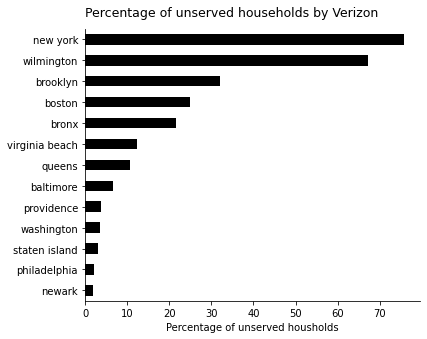

In [5]:
unserved(verizon, isp='Verizon')

In [6]:
verizon.groupby('major_city').price.value_counts(dropna=True, normalize=True)

major_city      price 
baltimore       40.00     0.990465
                39.99     0.006765
                49.99     0.002770
boston          39.99     0.752012
                49.99     0.208068
                40.00     0.036472
                64.99     0.003449
bronx           39.99     0.788603
                49.99     0.209348
                40.00     0.001952
                84.99     0.000049
                114.99    0.000049
brooklyn        39.99     0.775844
                49.99     0.224017
                114.99    0.000093
                40.00     0.000023
                84.99     0.000023
new york        39.99     0.764979
                49.99     0.232446
                64.99     0.001373
                114.99    0.000687
                74.99     0.000172
                84.99     0.000172
                94.99     0.000172
newark          39.99     0.691731
                49.99     0.177508
                40.00     0.130761
philadelphia    39.99     0.7737

In [7]:
verizon.price = verizon.price.replace({40: 39.99, 49.99: 39.99})
verizon = verizon[verizon.price == 39.99]
len(verizon)

224084

In [8]:
upspeed = 10
len(verizon[verizon.speed_up >= upspeed]) / len(verizon)

0.8774209671373235

In [9]:
nyc_cities = ['new york', 'brooklyn', 'queens', 'staten island', 'brooklyn', 'bronx']

In [10]:
verizon[verizon.major_city.isin(nyc_cities)].major_city.value_counts()

brooklyn         42965
queens           35268
bronx            20495
staten island    10023
new york          5810
Name: major_city, dtype: int64

In [11]:
boro2sample = {
    'new york': 5810,
    'bronx': 5142,
    'brooklyn': 9645,
    'queens': 8599,
    'staten island': 1801
} 

In [12]:
nyc = []
for city, _df in verizon.groupby('major_city'):
    if city in nyc_cities:
        n_sample = boro2sample.get(city)
        nyc.extend(_df.sample(n_sample, random_state=303).to_dict(orient='records'))
#         nyc.extend(_df.to_dict(orient='records'))
nyc = pd.DataFrame(nyc)
nyc['major_city'] = 'new york city'

# add NYC
verizon = verizon[~verizon.major_city.isin(nyc_cities)]
verizon = verizon.append(nyc)

In [13]:
homogenous = ['new york city', 'baltimore']
verizon = verizon[~verizon.major_city.isin(homogenous)]

In [14]:
len(verizon)

90750

In [15]:
verizon = bucket_and_bin(verizon)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


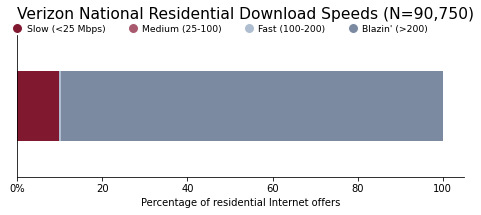

In [16]:
speed_breakdown(verizon, isp='Verizon')

In [17]:
verizon.major_city.nunique()

7

In [18]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in verizon.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


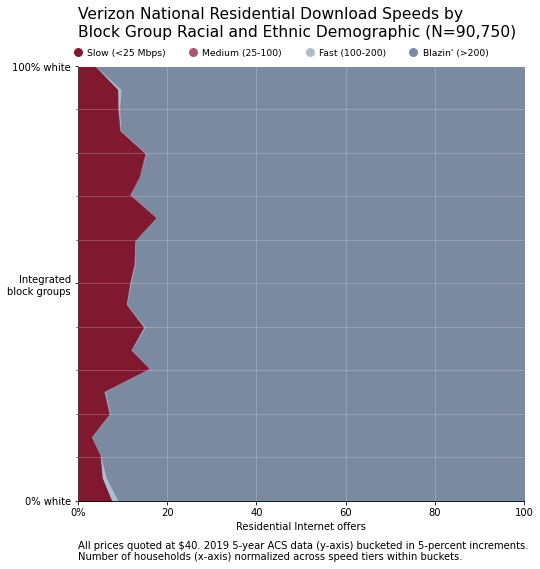

In [19]:
plot_race(verizon, isp='Verizon', price = "$40")

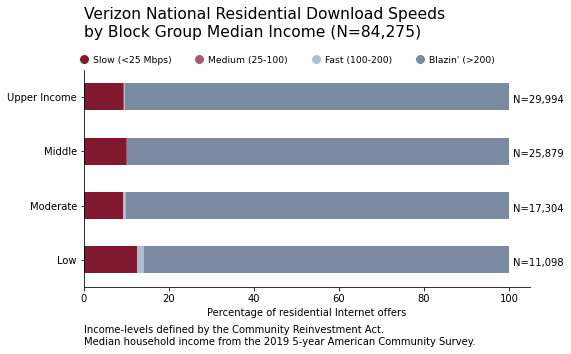

In [20]:
income(verizon, isp='Verizon')

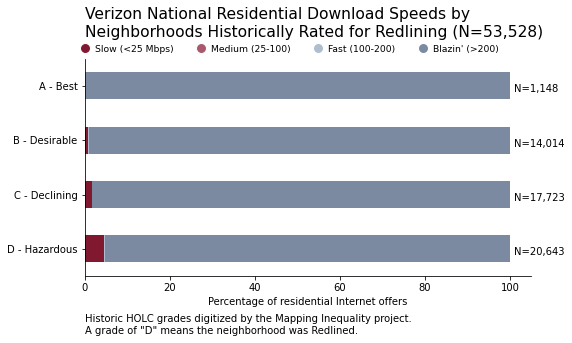

In [21]:
redlining(verizon, isp='Verizon')

## Cities

In [22]:
verizon.major_city.unique()

array(['washington', 'wilmington', 'boston', 'newark', 'philadelphia',
       'providence', 'virginia beach'], dtype=object)

boston


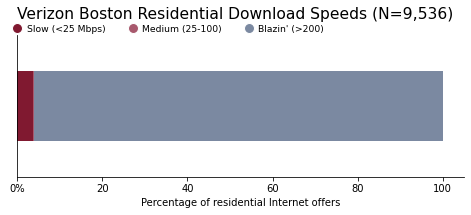

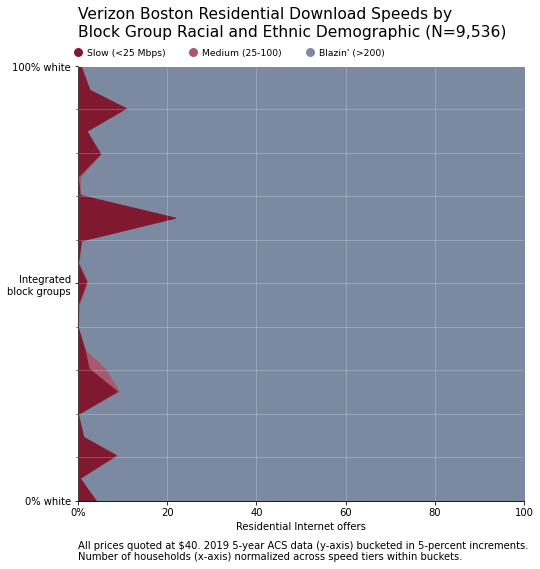

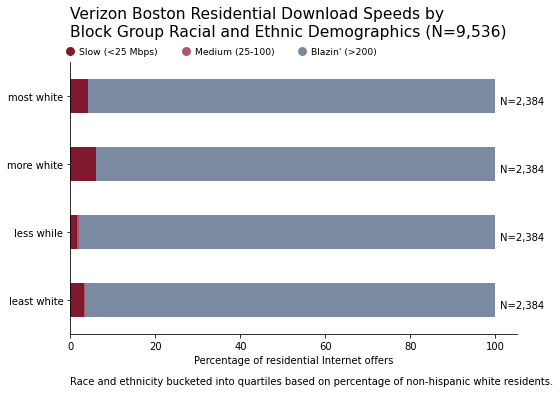

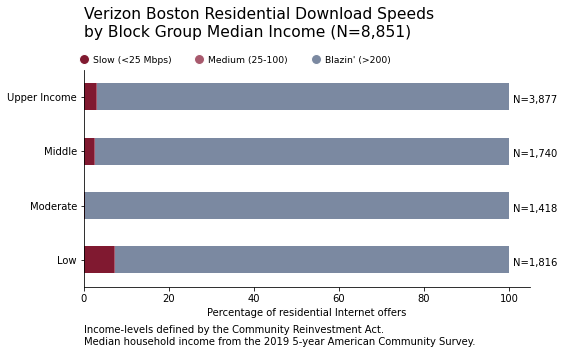

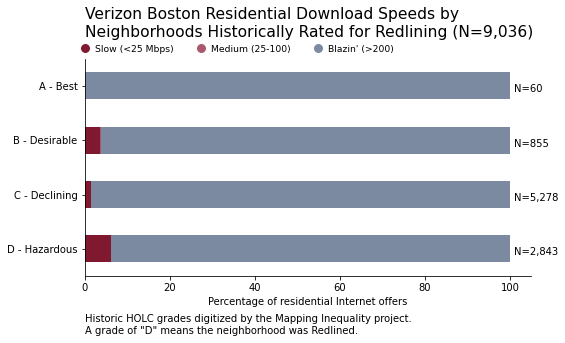

*******************************************************************************
newark


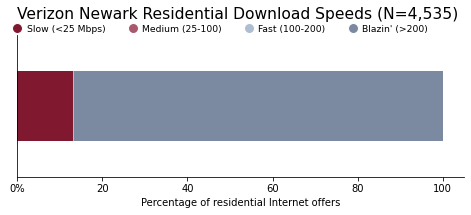

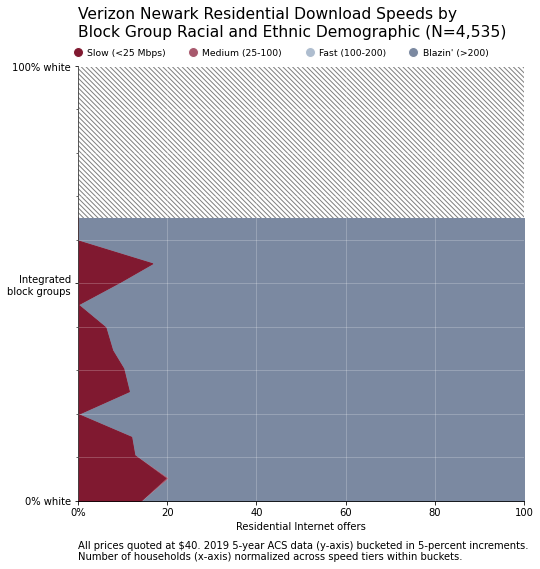

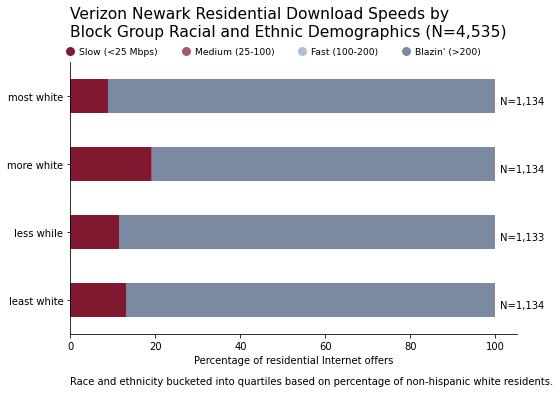

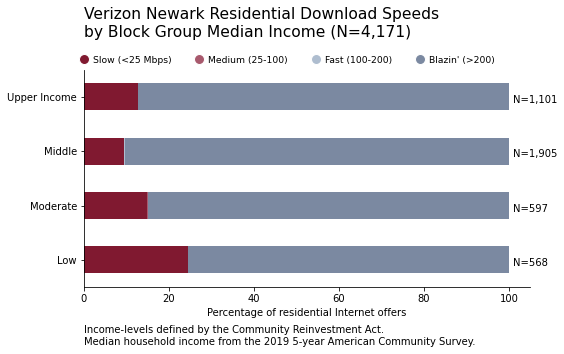

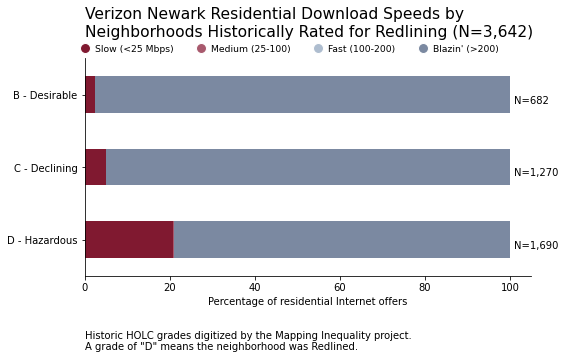

*******************************************************************************
philadelphia


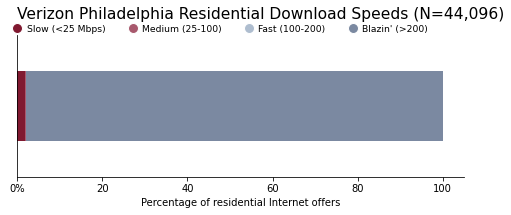

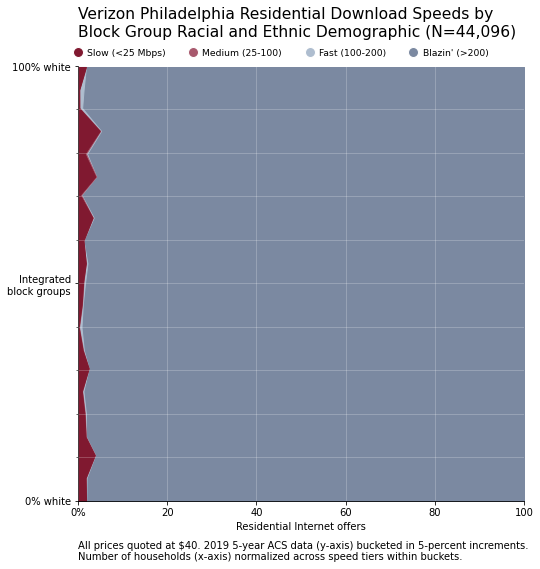

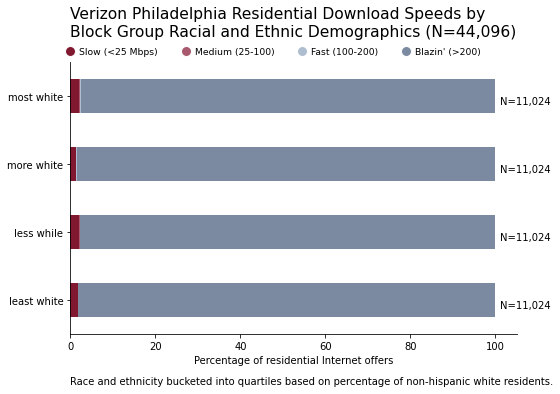

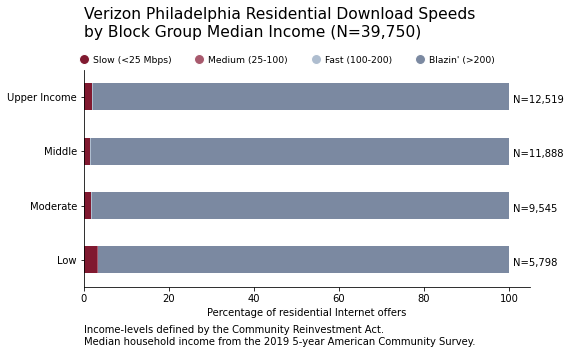

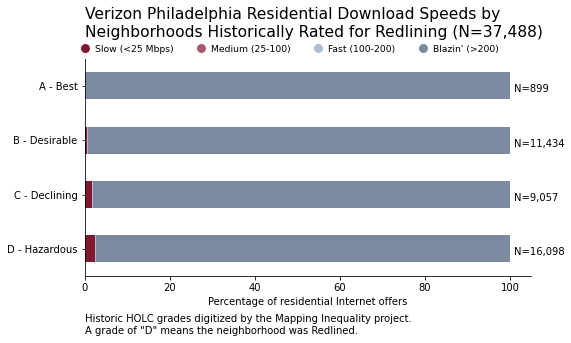

*******************************************************************************
providence


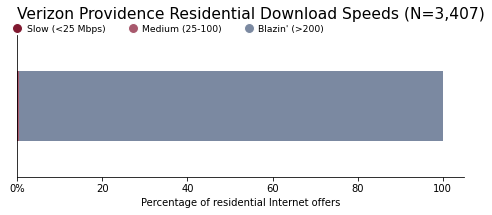

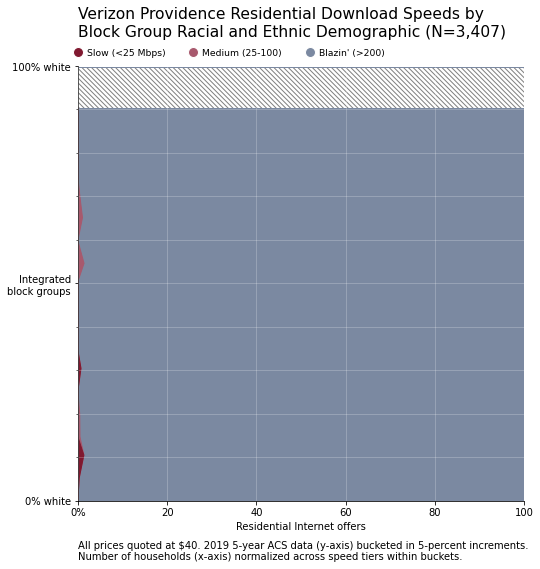

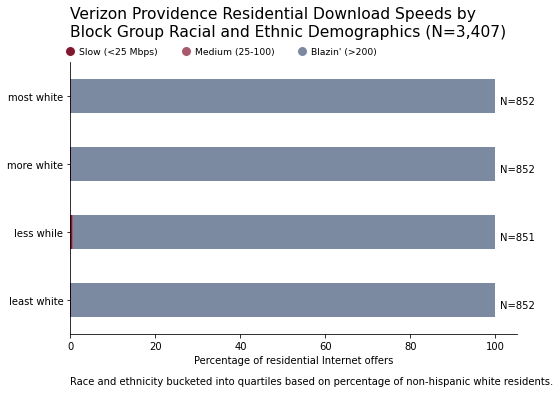

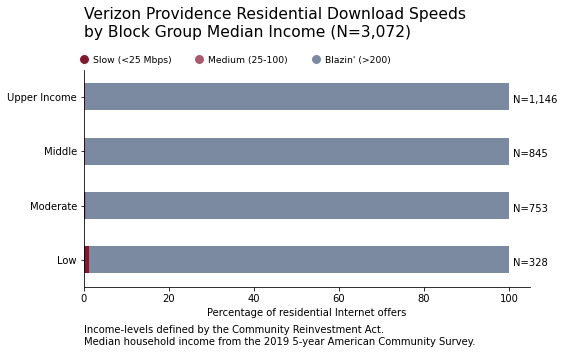

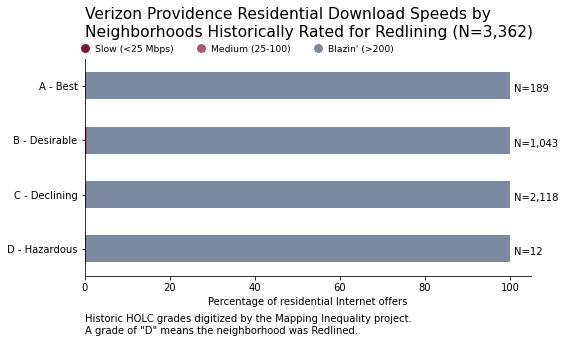

*******************************************************************************
virginia beach


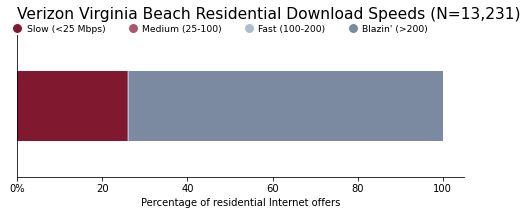

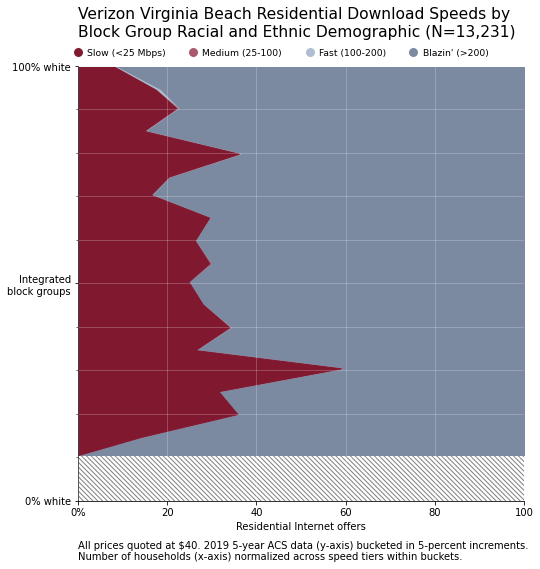

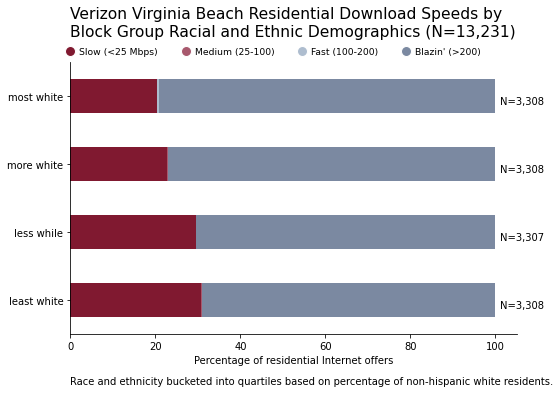

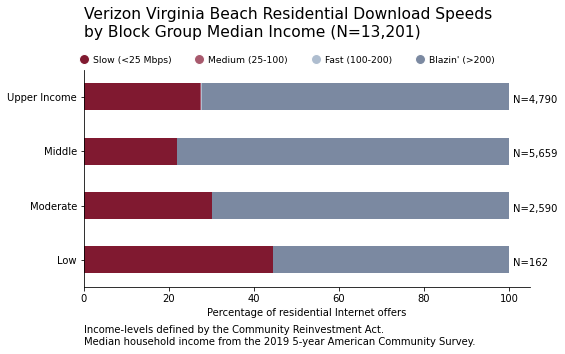

*******************************************************************************
washington


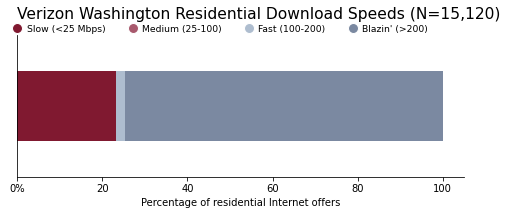

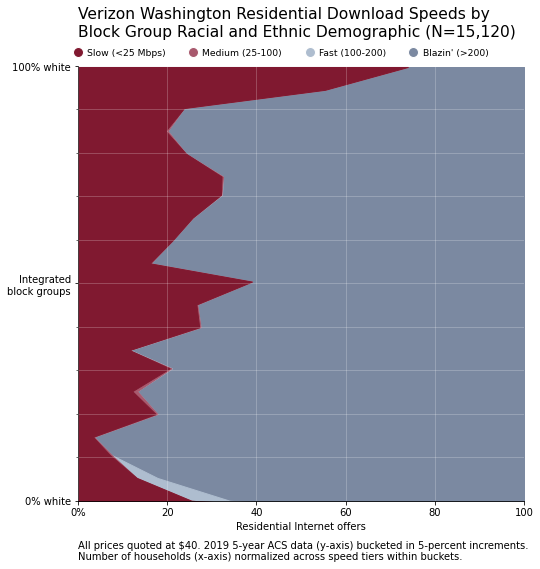

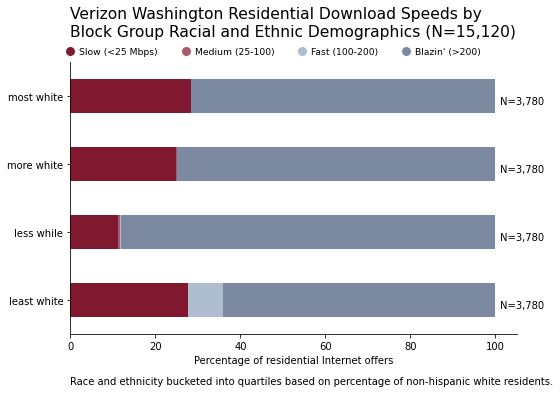

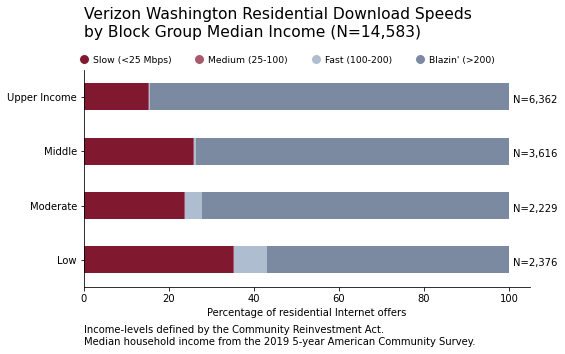

*******************************************************************************
wilmington


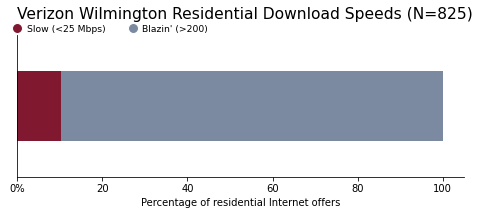

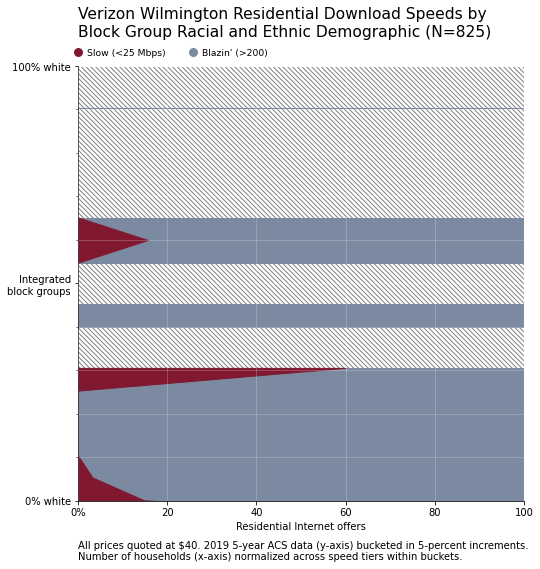

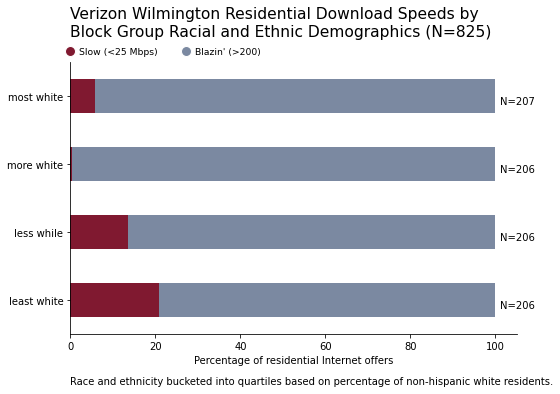

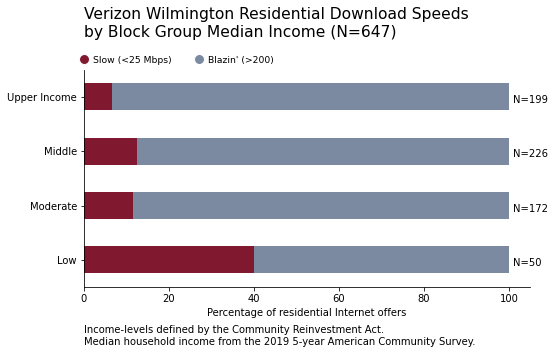

*******************************************************************************


In [23]:
for city, _df in verizon.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title(), isp='Verizon')
    plot_race(_df, location=city.title(), isp='Verizon', price='$40')
    race(_df, location=city.title(), isp='Verizon')
    income(_df, location=city.title(), isp='Verizon')
    redlining(_df, location=city.title(), isp='Verizon')
    print("*" * 79)

In [24]:
verizon[verizon.major_city == 'wilmington'].n_providers.value_counts()

2.0    825
Name: n_providers, dtype: int64